## Bibliotecas requeridas

In [1]:
# En caso de no estar instaladas, cambiar a True para ejecutar:
if False:
    !pip install -U scikit-learn scipy matplotlib pandas

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

## Datos MNIST

Para encontrar el directorio de trabajo en Windows:

In [7]:
!cd

C:\Users\Profesor


In [5]:
# Versión Linux

!pwd

/home/blackzafiro/blackzafiro/Programas/cuadernos/IPython/AM


Crear directorio local donde se descargarán los archivos del conjunto de datos

In [5]:
!mkdir data

In [6]:
mnist = fetch_openml(name="mnist_784", version=1, data_home="./data/")

¿Qué contiene el objeto que nos regresa esta función?

Documentación: [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)

In [7]:
type(mnist)

sklearn.utils._bunch.Bunch

In [8]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [9]:
# Etiquetas de clases
clases = np.unique(mnist.target)
print(clases)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [10]:
# Datos de entrenamiento
print(mnist.data.shape)
type(mnist.data)

(70000, 784)


pandas.core.frame.DataFrame

## MNIST

Contiene imágenes de 28x28 pixeles acomodadas como renglones de una matrix $X = m \times 784$, donde cada columna es la intensidad en escala de grises de un pixel.

In [11]:
lado = 28

In [12]:
lado * lado

784

In [13]:
mnist.data.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ejemplo: mostrar los ochos

In [14]:
m = 1000
etiqueta = '8'

pos_dígito = mnist.target == etiqueta
data_dígito = mnist.data[pos_dígito]
entrena_dígito = data_dígito[:m]
X = entrena_dígito
Y = mnist.target[pos_dígito][:m]

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
type(Y)

pandas.core.series.Series

In [17]:
# Extraer los datos de pandas para manipular como matriz de numpy

nX = X.to_numpy()

In [18]:
nY = Y.to_numpy()

In [19]:
img = nX[0].reshape((lado, lado))

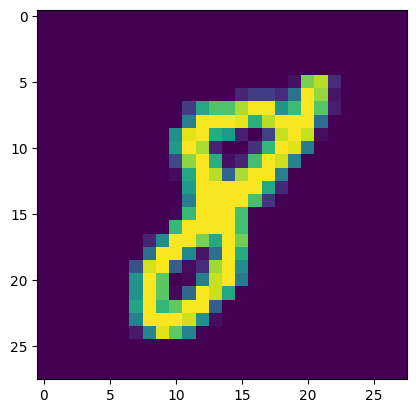

In [20]:
plt.imshow(img)

# Crear conjuntos entrenamiento, validación y prueba

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(nX, nY, test_size=0.3)

In [23]:
X_train.shape

(700, 784)

**Ejercicio:** Utilizar la misma función para generar los conjuntos de validación y prueba a partir de X_test y y_test.